<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/DNN/DeepReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning

O objetivo de Deep Reinforcement Learning é encontrar uma Função de Aproximação que permita resolver ambientes complexos, lidando com o problema da generalização.

Tudo começou em 2013, com o Deep Mind (que mais tarde seria comprado pelo Google para se tornar o braço de pesquisa em Deep Learning): 

https://arxiv.org/abs/1312.5602

https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf

## Reinforcement Learning

Considere o jogo Breakout. Neste jogo você controla uma pá na parte inferior da tela e tem que saltar a bola de volta para limpar todos os tijolos na metade superior da tela. Cada vez que você bate em um tijolo, ele desaparece e sua pontuação aumenta - você recebe uma recompensa.

Suponha que você queira ensinar uma rede neural a jogar este jogo. A entrada em sua rede seria imagens de tela, e a saída seria de três ações: esquerda, direita ou fogo (para iniciar a bola). Teria sentido tratá-lo como um problema de classificação - para cada tela de jogo você deve decidir, se você deve mover para a esquerda, direita ou pressionar o fogo. Parece simples? Claro, mas então você precisa de exemplos de treinamento, e muitos deles. Claro que você poderia gravar sessões de jogos usando jogadores experientes, mas isso não é realmente como aprendemos. Não precisamos de alguém para nos contar um milhão de vezes que se movem para escolher em cada tela. Nós apenas precisamos de feedback ocasional que fizemos a coisa certa e podemos descobrir todos os outros nós mesmos.

Esta é a tarefa que o aprendizado de reforço tenta resolver. O aprendizado de reforço situa-se entre a aprendizagem supervisionada e não supervisionada. No aprendizado supervisionado, usamos um rótulo alvo para cada exemplo de treinamento e na aprendizagem sem supervisão não tem rótulos. No aprendizado por reforço, temos rótulos dispersos e atrasados, as recompensas. Com base apenas nas recompensas, o agente deve aprender a comportar-se no ambiente.

<img src="https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/DNN/images/breakout.png">

Embora a ideia seja bastante intuitiva, na prática há inúmeros desafios. Por exemplo, quando você bate em um tijolo e ganha uma recompensa no jogo Breakout, muitas vezes não tem nada a ver com as ações (movimentos de remo) que você fez antes de obter a recompensa. Todo o trabalho duro já foi feito, quando você colocou a pá corretamente e saltou a bola de volta. Isso é chamado de problema de atribuição de crédito - ou seja, qual das ações anteriores foi responsável por receber a recompensa e até que ponto.

Depois de ter descoberto uma estratégia para coletar um certo número de recompensas, você deve ficar com ela ou experimentar alguma coisa que possa resultar em recompensas ainda maiores? No jogo Breakout acima, uma estratégia simples é mover-se para a margem esquerda e esperar lá. Quando lançado, a bola tende a voar para a esquerda com mais frequência do que a direita e você conseguirá marcar com facilidade cerca de 10 pontos antes de morrer. Você ficará satisfeito com isso ou quer mais? Isso é chamado de dilema explore-exploit - você deve explorar a estratégia de trabalho conhecida ou explorar outras estratégias possivelmente melhores?

O aprendizado por reforço é um modelo importante de como nós (e todos os animais em geral) aprendemos. Elogios de nossos pais, notas na escola, salário no trabalho - estes são exemplos de recompensas. Problemas de atribuição de crédito e dilemas explore-exploit surgem todos os dias, tanto nos negócios como nos relacionamentos. É por isso que é importante estudar este problema, e os jogos formam uma sandbox maravilhosa para experimentar novas abordagens.

## Markov Decision Process

Agora, a questão é como você formaliza um problema de aprendizado por reforço, para que você possa raciocinar sobre ele? O método mais comum é representá-lo como um Processo de Decisão Markov.

Suponha que você seja um agente, situado em um ambiente (por exemplo, o jogo Breakout). O ambiente está em certo estado (por exemplo, localização da pá, localização e direção da bola, existência de cada tijolo e assim por diante). O agente pode executar certas ações no ambiente (por exemplo, mover a pá para a esquerda ou para a direita). Essas ações às vezes resultam em uma recompensa (por exemplo, aumento na pontuação). As ações transformam o ambiente e conduzem a um novo estado, onde o agente pode executar outra ação, e assim por diante. As regras sobre como você escolhe essas ações são chamadas de política. O ambiente em geral é estocástico, o que significa que o próximo estado pode ser um pouco aleatório (por exemplo, quando você perde uma bola e lança uma nova, vai para uma direção aleatória).

<img src="images/mdp.png">

O conjunto de estados e ações, juntamente com as regras para a transição de um estado para outro, compõem um processo de decisão Markov. Um episódio deste processo (por exemplo, um jogo) forma uma sequência finita de estados, ações e recompensas:

<img src="images/mdp2.png">

Aqui si representa o estado, ai é a ação e ri + 1 é a recompensa depois de executar a ação. O episódio termina com o estado do terminal sn (por exemplo, "game over"). Um processo de decisão de Markov baseia-se na suposição de Markov, que a probabilidade de o próximo estado si + 1 depende apenas do estado atual si e da ação ai, mas não de estados ou ações anteriores.

## Discounted Future Reward

Para se comportar bem a longo prazo, precisamos levar em conta não só as recompensas imediatas, mas também as recompensas futuras que vamos conseguir. Como devemos fazer isso?

Dada uma série do processo de decisão de Markov, podemos calcular facilmente a recompensa total de um episódio:

<img src="https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/DNN/images/reward1.png">

Dado que, a recompensa futura total a partir do ponto de tempo a seguir pode ser expressa como:

<img src="https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/DNN/images/reward2.png">

Mas porque o nosso ambiente é estocástico, nunca podemos ter certeza, se conseguirmos as mesmas recompensas na próxima vez que realizarmos as mesmas ações. Quanto mais no futuro nós vamos, mais pode divergir. Por esse motivo, é comum usar uma recompensa futura com desconto em vez disso:

<img src="https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/DNN/images/reward3.png">

Aqui γ é o fator de desconto entre 0 e 1 - quanto mais no futuro a recompensa é, menos levamos em consideração. É fácil de ver, que a recompensa futura com desconto no tempo passo t pode ser expressa em termos da mesma coisa no tempo passo t + 1:

<img src="https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/DNN/images/reward4.png">

Se definimos o fator de desconto γ = 0, nossa estratégia será míope e confiamos apenas nas recompensas imediatas. Se quisermos equilibrar entre recompensas imediatas e futuras, devemos definir fator de desconto para algo como γ = 0.9. Se o nosso ambiente for determinista e as mesmas ações sempre resultarão nas mesmas recompensas, então podemos definir o fator de desconto γ = 1.

Uma boa estratégia para um agente seria sempre escolher uma ação que maximize a recompensa futura (descontada).

## Play Game com Agente Baseado em IA

<img src="https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/DNN/images/catch-game.jpg">

Catch é um jogo de arcade muito simples, que você provavelmente já jogou. Os frutos estão caindo do topo da tela e o jogador precisa pegá-los com um cesto. Para cada fruta capturada, o jogador recebe um ponto. Para cada fruta perdida, o jogador perde um ponto. Nosso objetivo aqui é permitir que o computador jogue este game por si só.

Ao jogar Catch, o jogador deve decidir entre 3 possíveis ações. O jogador pode mover a cesta para a esquerda, para a direita ou ficar na posição. A base para esta decisão é o estado atual do jogo, a posição do fruto e a posição do cesto, ambos visíveis na tela. Nosso objetivo é, portanto, criar um modelo que, dado o conteúdo da tela do jogo, escolha a ação que leva à maior pontuação possível.

Esta tarefa poderia ser enquadrada como um problema de classificação simples. Poderíamos coletar dados de treinamento, permitindo que jogadores humanos experientes jogassem muitos jogos e, em seguida, treinassem um modelo para escolher a ação "correta" que espelha os jogadores experientes. Não é assim que os humanos aprendem no entanto. Os seres humanos podem aprender um jogo sem orientação. Isso é muito útil. Imagine que você teria que contratar um monte de especialistas para realizar uma tarefa milhares de vezes toda vez que você queria aprender algo tão simples como Catch. Seria muito caro e muito lento. Aqui, usaremos Deep Reinforcement Learning, onde o modelo aprende da experiência, em vez de dados de treinamento rotulados.

In [1]:
# Imports
import numpy as np
import json
import matplotlib.pyplot as plt
import time
from PIL import Image
from IPython import display
import seaborn
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import sgd

%matplotlib inline
seaborn.set()

Using TensorFlow backend.


# Preparando o Game

No jogo, frutas, representadas por azulejos brancos, caem do topo. O objetivo é pegar os frutos com um basket (representado por azulejos brancos). Se você pegar uma fruta, você obtém um ponto (sua pontuação sobe por um), se você perder uma fruta, perdeu um (sua pontuação diminui).

Não se preocupe muito com os detalhes da implementação, o foco aqui deve ser na IA, e não no jogo. Apenas certifique-se de executar esta célula para que ela seja definida.

In [0]:
class Catch(object):
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.reset()

    def _update_state(self, action):
        """
        Input: ações e estados
        Ouput: novos estados e recompensas
        """
        state = self.state
        if action == 0:  # left
            action = -1
        elif action == 1:  # stay - fica onde está
            action = 0
        else:
            action = 1  # right
        f0, f1, basket = state[0]
        new_basket = min(max(1, basket + action), self.grid_size-1)
        f0 += 1
        out = np.asarray([f0, f1, new_basket])
        out = out[np.newaxis]

        assert len(out.shape) == 2
        self.state = out

    def _draw_state(self):
        im_size = (self.grid_size,)*2
        state = self.state[0]
        canvas = np.zeros(im_size)
        canvas[state[0], state[1]] = 1  # desenha fruta
        canvas[-1, state[2]-1:state[2] + 2] = 1  # desenha basket
        return canvas
        
    def _get_reward(self):
        fruit_row, fruit_col, basket = self.state[0]
        if fruit_row == self.grid_size-1:
            if abs(fruit_col - basket) <= 1:
                return 1
            else:
                return -1
        else:
            return 0

    def _is_over(self): # final do game
        if self.state[0, 0] == self.grid_size-1:
            return True
        else:
            return False

    def observe(self):
        canvas = self._draw_state()
        return canvas.reshape((1, -1))

    def act(self, action):
        self._update_state(action)
        reward = self._get_reward()
        game_over = self._is_over()
        return self.observe(), reward, game_over

    def reset(self):
        n = np.random.randint(0, self.grid_size-1, size=1)
        m = np.random.randint(1, self.grid_size-2, size=1)
        self.state = np.asarray([0, n, m])[np.newaxis]

Além de definir o jogo, precisamos definir algumas variáveis e funções auxiliares. Execute as células abaixo para defini-las.

In [0]:
# O último time frame faz o controle do quadro em que estamos
last_frame_time = 0

# Traduz as ações para palavras humanas legíveis
translate_action = ["Left","Stay","Right","Create Ball","End Test"]

# Tamanho do campo de jogo
grid_size = 10

In [0]:
def display_screen(action,points,input_t):
    # Renderiza a tela do jogo
    global last_frame_time
    print("Action %s, Points: %d" % (translate_action[action],points))
    
    # Somente mostra a tela do jogo se não for game over
    if("End" not in translate_action[action]):
        plt.imshow(input_t.reshape((grid_size,)*2), interpolation='none', cmap='gray')
        display.clear_output(wait=True)
        display.display(plt.gcf())
    last_frame_time = set_max_fps(last_frame_time)
    
    
def set_max_fps(last_frame_time,FPS = 1):
    current_milli_time = lambda: int(round(time.time() * 1000))
    sleep_time = 1./FPS - (current_milli_time() - last_frame_time)
    if sleep_time > 0:
        time.sleep(sleep_time)
    return current_milli_time()

## Deep Reinforcement Learning

Agora vamos a parte emocionante.

## Q-Learning 

No Q-learning, definimos uma função Q(s, a) que representa a recompensa futura máxima com desconto quando executamos a ação a no estado s e continuamos de forma óptima a partir desse ponto.

Uma boa maneira de entender Q-learning é comparar jogar Catch com jogar xadrez. Em ambos os jogos, você recebe um estado s (xadrez: posições das figuras no tabuleiro, Catch: localização do fruto e do cesto), no qual você deve tomar uma ação a (xadrez: mova uma figura, Catch: move o cesto à esquerda, à direita ou fica onde você está). Como resultado, haverá alguma recompensa e um novo estado s '. O problema tanto com Catch quanto com o xadrez é que as recompensas não aparecerão imediatamente após você ter tomado a ação. Em Catch, você só ganha recompensas quando os frutos caem na cesta ou caem no chão, e no xadrez você só ganha uma recompensa quando ganha ou perde o jogo. As recompensas são _sparsely distributed_, na maioria das vezes, r será 0. Quando há uma recompensa, nem sempre é resultado da ação tomada imediatamente antes. Algumas ações tomadas muito antes podem ter causado a vitória. Determinar qual ação é responsável pela recompensa é muitas vezes referido como _credit assignment problem_.

Como as recompensas são atrasadas, os bons jogadores de xadrez não escolhem suas peças apenas pela recompensa imediata, mas pela recompensa futura esperada. Eles não só pensam sobre se eles podem eliminar uma figura de oponentes no próximo movimento, mas como tomar uma determinada ação agora irá ajudá-los a longo prazo.

No Q-learning, escolhemos nossa ação com base na maior recompensa futura esperada. Enquanto no estado s, estimamos a recompensa futura para cada ação possível a. Assumimos que depois de terem feito uma ação e mudado para o próximo estado s', tudo funciona perfeitamente. Como em finanças, nós descontamos recompensas futuras, já que elas são incertas.

A recompensa futura esperada Q(s, a) dado um estado s e uma ação a é, portanto, a recompensa r que segue diretamente de um mais a recompensa futura esperada Q(s', a') se a ação ideal a' for tomada em o seguinte estado s', descontado pelo fator de desconto gama.

Q(s,a) = r + gamma * max Q(s’,a’)

Os bons jogadores de xadrez são muito bons na estimativa de recompensas futuras em sua cabeça. Em outras palavras, sua função Q (s, a) é muito precisa. A maioria das práticas de xadrez gira em torno do desenvolvimento de uma melhor função Q. Os jogadores examinam muitos jogos antigos para saber como os movimentos específicos se desenrolaram no passado e a probabilidade de uma determinada ação levar a vitória.

Mas como podemos estimar uma boa função Q? É aqui que as redes neurais entram em jogo.


## Como Treinar o Agente

Ao jogar, geramos muitas experiências consistindo no estado inicial s, na ação tomada a, na recompensa ganha r e no estado que seguiu s'. Essas experiências são nossos dados de treinamento. Podemos enquadrar o problema de estimar Q(s, a) como um simples problema de regressão. Dado um vetor de entrada consistindo de s e uma rede neural é suposto prever o valor de Q(s, a) igual ao alvo: r + gama * max Q(s', a'). Se for bom prever Q(s, a) para diferentes estados s e ações a, temos uma boa aproximação de Q. Observe que Q(s', a') é também uma predição da rede neural que estamos treinando.

Dado um lote de experiências < s, a, r, s’ >, o processo de treinamento então é o seguinte:

1. Para cada ação possível a' (esquerda, direita, permanência), preveja a recompensa futura esperada Q(s', a') usando a rede neural
2. Escolha o valor mais alto das três predições max Q(s', a')
3. Calcule r + gama * max Q (s', a'). Este é o valor alvo da rede neural.
4. Treina a rede neural usando a função de perda 1/2(predicted_Q(s,a) - target)^2

Durante a jogabilidade, todas as experiências são armazenadas em uma memória de repetição. Esta é a classe abaixo.

A função de lembrança simplesmente salva uma experiência em uma lista. A função get_batch executa os passos 1 a 3 da lista acima e retorna uma entrada e um vetor de destino. O treinamento real é feito em uma função discutida abaixo.

In [0]:
class ExperienceReplay(object):
    def __init__(self, max_memory=100, discount=.9):
        """
        Setup
        max_memory: o número máximo de experiências que queremos armazenar
        memory: uma lista de experiências
        discount: o fator de desconto para a experiência futura
        
        Na memória, a informação se o jogo terminou no estado é armazenada separadamente em uma matriz aninhada
        [...
        [experience, game_over]
        [experience, game_over]
        ...]
        """
        self.max_memory = max_memory
        self.memory = list()
        self.discount = discount

    def remember(self, states, game_over):
        # Salvando o estado na memória
        self.memory.append([states, game_over])
        
        # Nós não queremos armazenar memórias infinitas, então, se tivermos demais, 
        # simplesmente excluímos o mais antigo
        if len(self.memory) > self.max_memory:
            del self.memory[0]

    def get_batch(self, model, batch_size=10):
        
        # Quantas experiências temos?
        len_memory = len(self.memory)
        
        # Calcule o número de ações que podem ser tomadas no jogo
        num_actions = model.output_shape[-1]
        
        # Dimensões do campo de jogo
        env_dim = self.memory[0][0][0].shape[1]
        
        # Queremos retornar um vetor de entrada e destino com entradas de um estado observado...
        inputs = np.zeros((min(len_memory, batch_size), env_dim))
        
        # ...e target r + gamma * max Q(s’,a’)
        # Observe que nosso alvo é uma matriz, com possíveis campos não só para a ação realizada, mas também 
        # para as outras ações possíveis. As ações não tomam o mesmo valor que a previsão de não afetá-las.
        targets = np.zeros((inputs.shape[0], num_actions))
        
        # Nós desenhamos estados para aprender aleatoriamente
        for i, idx in enumerate(np.random.randint(0, len_memory, size=inputs.shape[0])):

            state_t, action_t, reward_t, state_tp1 = self.memory[idx][0]
            
            # Também precisamos saber se o jogo terminou nesse estado
            game_over = self.memory[idx][1]

            # Adicione o estado s à entrada
            inputs[i:i+1] = state_t
            
            # Primeiro, preenchemos os valores-alvo com as previsões do modelo. 
            # Eles não serão afetados pelo treinamento (uma vez que a perda de treinamento para eles é 0)
            targets[i] = model.predict(state_t)[0]
            
            """
            Se o jogo acabou, a recompensa esperada Q (s, a) deve ser a recompensa final r.
            Ou então o target value é r + gamma * max Q(s’,a’)
            """
            Q_sa = np.max(model.predict(state_tp1)[0])
            
            # Se o jogo acabou, a recompensa é a recompensa final.
            if game_over:  
                targets[i, action_t] = reward_t
            else:
                # r + gamma * max Q(s’,a’)
                targets[i, action_t] = reward_t + self.discount * Q_sa
        return inputs, targets


## Definindo o Modelo

Agora é hora de definir o modelo que irá aprender Q. Estamos usando o Keras como frontend para Tensorflow ou Theano. Nosso modelo de linha de base é uma rede muito simples de 3 camadas densas. Você pode brincar com modelos mais complexos e ver se você pode melhorar o desempenho.

In [0]:
def baseline_model(grid_size,num_actions,hidden_size):
    model = Sequential()
    model.add(Dense(hidden_size, input_shape=(grid_size**2,), activation='relu'))
    model.add(Dense(hidden_size, activation='relu'))
    model.add(Dense(num_actions))
    model.compile(sgd(lr = .1), "mse")
    return model

## Parâmetros

Antes de começar a treinar, precisamos definir alguns parâmetros. Você também pode experimentar com esses.

In [0]:
# Parâmetros
epsilon = .1      # Exploração
num_actions = 3   # [move_left, stay, move_right]
max_memory = 500  # Número máximo de experiências que estamos armazenando
hidden_size = 100 # Tamanho das camadas ocultas
batch_size = 1    # Número de experiências que usamos para treinar por lote
grid_size = 10    # Tamanho do campo de jogo

In [8]:
# Modelo
model = baseline_model(grid_size,num_actions,hidden_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 20,503
Trainable params: 20,503
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Define environment/game
env = Catch(grid_size)

# Inicializa o objeto de repetição da experiência
exp_replay = ExperienceReplay(max_memory=max_memory)

## Treinando o Modelo

O treinamento é relativamente direto. Nós deixamos o modelo jogar o jogo. Enquanto joga, ele gera dados de treinamento na forma de experiências. Usamos esses dados de treinamento para treinar nosso estimador Q.

In [0]:
def train(model, epochs, verbose = 1):
    win_cnt = 0
    win_hist = []
    
    for e in range(epochs):
        loss = 0.
        env.reset()
        game_over = False
        input_t = env.observe()
        
        while not game_over:
            
            # O aluno está atuando na última tela de jogo observada
            # input_t é um vetor que contém a representação da tela do jogo
            input_tm1 = input_t
            
            if np.random.rand() <= epsilon:
                action = np.random.randint(0, num_actions, size=1)
            else:
                q = model.predict(input_tm1)
                # Escolhemos a ação com a maior recompensa esperada
                action = np.argmax(q[0])

            # Aplicar ação, obter recompensas e novo estado
            input_t, reward, game_over = env.act(action)

            if reward == 1:
                win_cnt += 1        
            
            # Experiência 
            exp_replay.remember([input_tm1, action, reward, input_t], game_over)    
            
            # Carregar lote de experiências
            inputs, targets = exp_replay.get_batch(model, batch_size=batch_size)
  
            # Modelo de trem sobre experiências
            batch_loss = model.train_on_batch(inputs, targets)
            
            loss += batch_loss
        if verbose > 0:
            print("Epoch {:03d}/{:03d} | Loss {:.4f} | Win count {}".format(e, epochs, loss, win_cnt))
        win_hist.append(win_cnt)
    return win_hist

## Playing Vários Games

Para se tornar um bom jogador, nosso modelo precisa jogar _many_ games. Descobri que, após cerca de 4.000 jogos, tornou-se um jogador decente. Por causa de um notebook legível, desabilitamos a saída do treinador aqui. Veja a seção sobre avaliação do progresso abaixo para um gráfico.

In [11]:
# Número de jogos jogados no treinamento. O modelo precisa de cerca de 4.000 jogos até que ele jogue bem
epoch = 5000 

#  Win count- número acumulado de vitórias

# Treinando o Modelo
hist = train(model, epoch, verbose=0)
print("Treinamento Concluído!")

Treinamento Concluído!


In [12]:
hist[:10]

[0, 0, 0, 0, 0, 0, 1, 2, 2, 2]

## Testando o Modelo

Agora que temos um ótimo jogador Catch à mão, queremos vê-lo em ação! A função de teste é muito semelhante à função do trem. Só que nos testes não salvamos as experiências e treinamos nelas. Mas agora podemos usar as funções de renderização definidas acima para assistir nosso modelo de jogo!

In [0]:
def test(model):
    global last_frame_time
    plt.ion()
    env = Catch(grid_size)
    c = 0
    last_frame_time = 0
    points = 0
    
    for e in range(10):
        loss = 0.
        env.reset()
        game_over = False
        input_t = env.observe()
        c += 1
        while not game_over:
            input_tm1 = input_t
            q = model.predict(input_tm1)
            action = np.argmax(q[0])
            input_t, reward, game_over = env.act(action)
            points += reward
            display_screen(action,points,input_t)
            c += 1

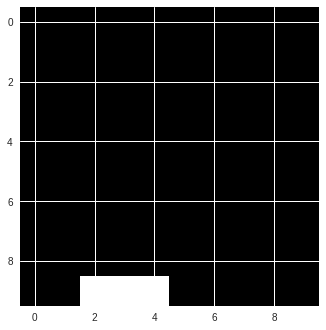

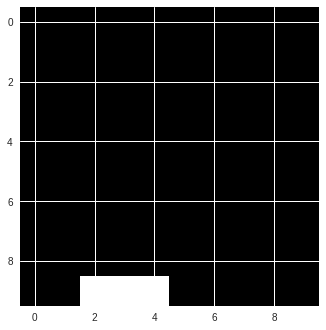

In [16]:
test(model)

## Avaliando o Progresso

Essa demo é bastante impressionante, hein? Antes de terminar esta pequena excursão, vamos ter um olhar mais atento sobre o modo como nosso modelo realmente aprendeu. Mais cedo, salvamos a história das vitórias. Agora, podemos traçar a média móvel da diferença, ou seja, quantas vitórias adicionais marcaram o modelo por jogo extra. 1 vitória extra por jogo significa que o modelo ganha cada jogo (pega todas as frutas), 0 significa que ela perde todas elas. Como você pode ver, o modelo se aproxima de uma taxa de vitória de 100% ao longo do tempo. Após 4000 peças, o modelo ganha de forma relativamente consistente. As quedas aleatórias no desempenho são provavelmente devido ao epsilon de escolha aleatória que são feitas de tempos em tempos. Um modelo melhor se aproximaria de 100% mais rápido.

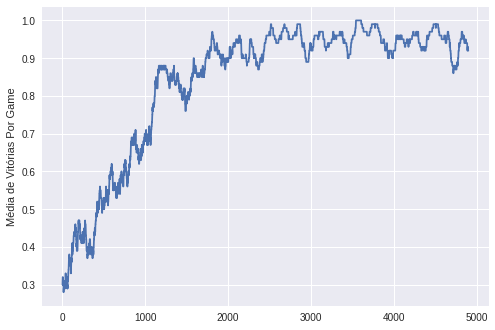

In [17]:
def moving_average_diff(a, n=100):
    diff = np.diff(a)
    ret = np.cumsum(diff, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average_diff(hist))
plt.ylabel('Média de Vitórias Por Game')
plt.show()

### Referências:

Data Science Academy
https://www.datascienceacademy.com.br

Desmystifying Deep Reinforcement Learning
https://www.intelnervana.com/demystifying-deep-reinforcement-learning/

Deep Reinforcement Learning Stanford
http://rll.berkeley.edu/deeprlcourse/

Deep Mind
https://deepmind.com/blog/deep-reinforcement-learning/
